In [2]:
import os
import sys
import importlib    
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

#Paths
housing_path = r"E:/Future Plans/Post-Graduation-Projects/Hands-on Machine Learning/first-project/datasets/housing.csv"
python_scripts_path = r"E:/Future Plans/Post-Graduation-Projects/Hands-on Machine Learning/first-project/python-scripts"

#Path initialization so that Python can see where our script lies.
script_dir = os.path.abspath(python_scripts_path) 
sys.path.append(script_dir)

#Imports
from sklearn.model_selection import StratifiedShuffleSplit

from test_set_check import test_set_check

from split_train_test_by_id import split_train_test_by_id
from load_housing_data import load_housing_data


In [ ]:
Standard correlation: Linear correlation/relationship between 2 pieces of data. Examples:

A person has 2 attributes - shoe size and height.

If his height increases > shoe size increases. 

If his height decreases > shoe size reduces

In [8]:
housing = load_housing_data(housing_path)
#numeric only option: https://stackoverflow.com/questions/76533178/corr-results-in-valueerror-could-not-convert-string-to-float
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

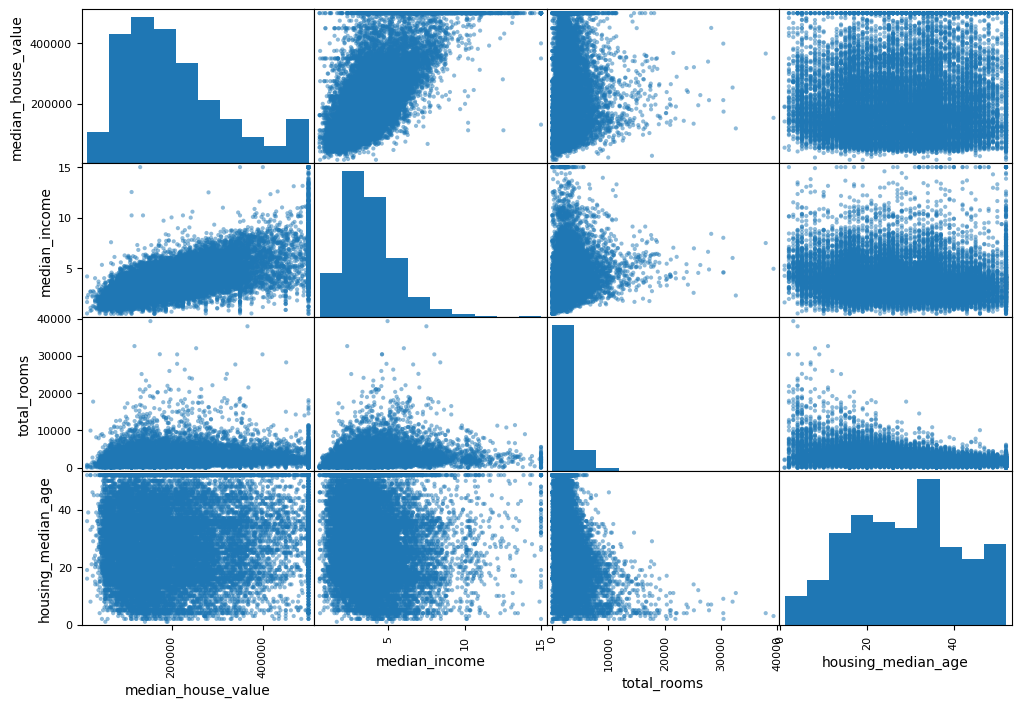

In [4]:
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

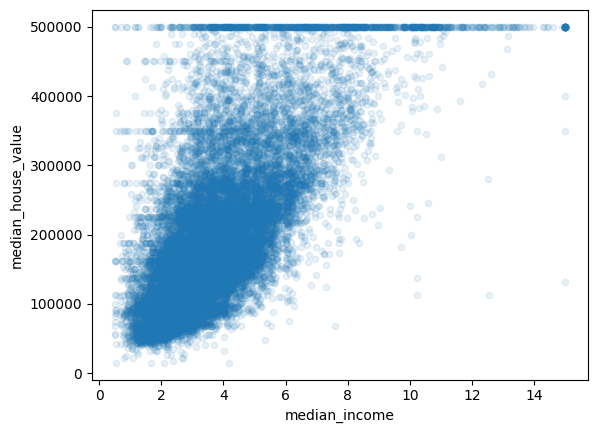

In [15]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

A thing we should do is to take 1 attribute + compare it to other attributes > find out relationship (correlation) between each of them
E.g. only **total number of rooms** is not useful, we should combine it with **number of households** = **number of rooms per household**
Basically, taking 1 attribute and divide it with the other.

In [12]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [13]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64